# Policing and Voronoi

## Introduction
 I recently ran across this quote on Twitter.

_Geoplot is to cartopy what seaborn is to matplotlib._

So I decided to investigate geoplot.  One of the graphics it supports is Voronoi tesselation.  This is where, given a set of points in a plane, for each point you draw the  region consisting of all parts of the plane closer to that point than to any other.

This inspired me to drag down the database of Queensland Police Station locations, and see what the Voronoi map looks like.


---------------
## Implementation

The following are the magics and imports for the Notebook

### Magics

```lab_black``` formats python cells, ```watermark``` provides reproducability information.

In [46]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [47]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


### Imports

Because I am aiming for some 'nice' graphics, I import the cartopy gridline modules.

In [133]:
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd
import geopandas as gpd

import mapclassify as mc

import matplotlib.pyplot as plt
import numpy as np
import shapely

from cartopy.mpl.gridliner import (
    LONGITUDE_FORMATTER,
    LATITUDE_FORMATTER,
)
import cartopy.crs as ccrs

import math
import random

import doctest

import sys
import os
import subprocess
import datetime
import platform
import datetime

### Preliminaries

In order to hget a recongizable map, the ```geoplot``` Voronoi diagram is best clipped to a polygon of interest  (in this case, the borders of Queensland).  Thankfully, the Queensland Government provides just such a data set.

I use the ```geopandas``` package the read the shapefile.

In [49]:
border_path = 'D:\\QLDBorder\\PolygonBorder\\QLD_STATE_POLYGON_shp.shp'

In [50]:
border = gpd.read_file(border_path)

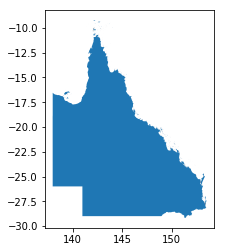

In [51]:
border.plot()

Yep, looks like Queensland.  Looking at it in a different projection (Web Mercator) doesn't make much difference.  Queensland is close to the Equator, so Mercator distortion is minimal (at least, to my eyes).

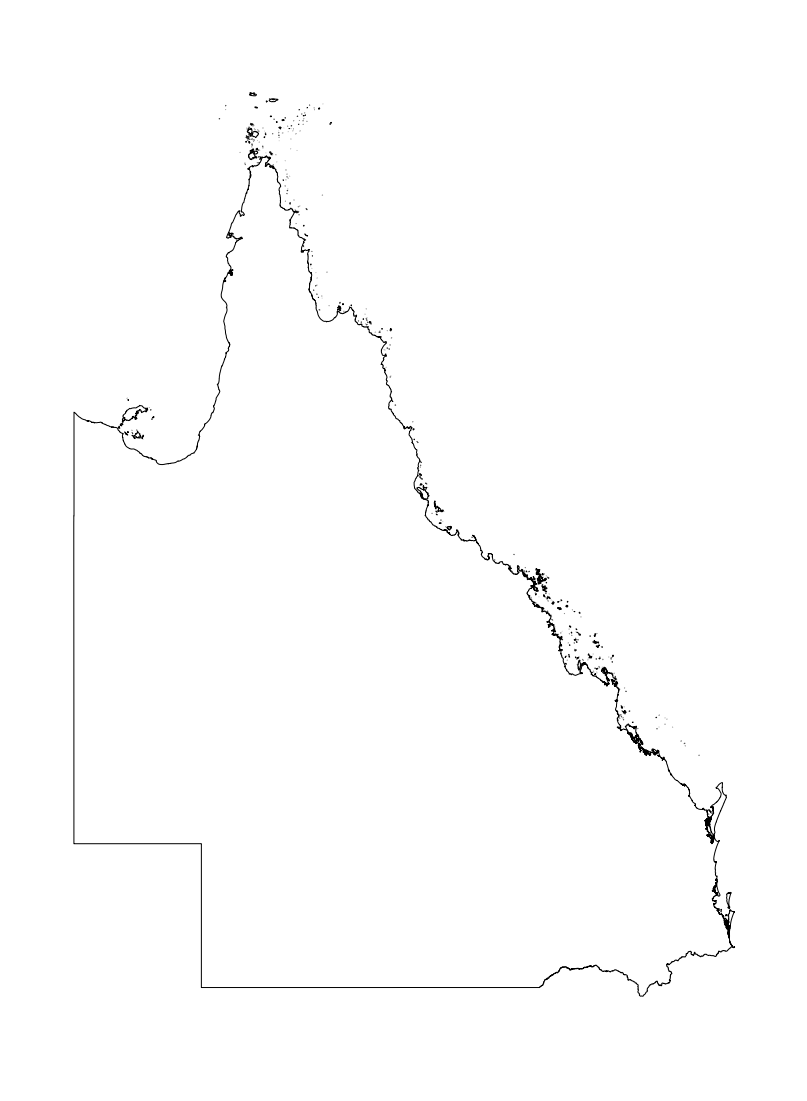

In [52]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=gcrs.WebMercator())

gplt.polyplot(border, ax=ax, facecolor='white')

So now we have our basemap, I read the shapefile of the Police Station locations, again using ```geopandas```.

In [53]:
stations_path = (
    'D:\\QLDBorder\\QLD_Stations\\QPS_STATIONS.shp'
)

In [54]:
stations = gpd.read_file(stations_path)

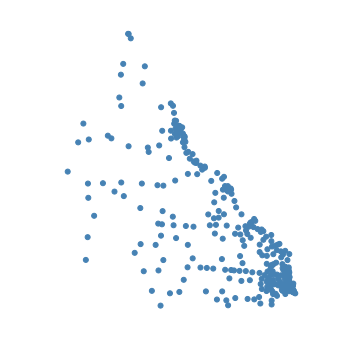

In [55]:
gplt.pointplot(stations)

Yep, looks plausible.  Looking at the data set is a little disappointing, I thought there might be data on number of police, etc: but no, just location.

In [56]:
stations.head()

,NAME,geometry
0,ACACIA RIDGE STATION,POINT (153.026536000353 -27.58819799995126)
1,ADAVALE STATION,POINT (144.5974909997149 -25.91081900032646)
2,AGNES WATER STATION,POINT (151.907981 -24.212576)
3,ALBANY CREEK STATION,POINT (152.9651980003101 -27.344526000423)
4,ALLORA STATION,POINT (151.9845919999407 -28.03528800019978)


### First Mapping Effort

We use ```geoplot``` to plot the polygons that make up the state, and the points that represent police stations.

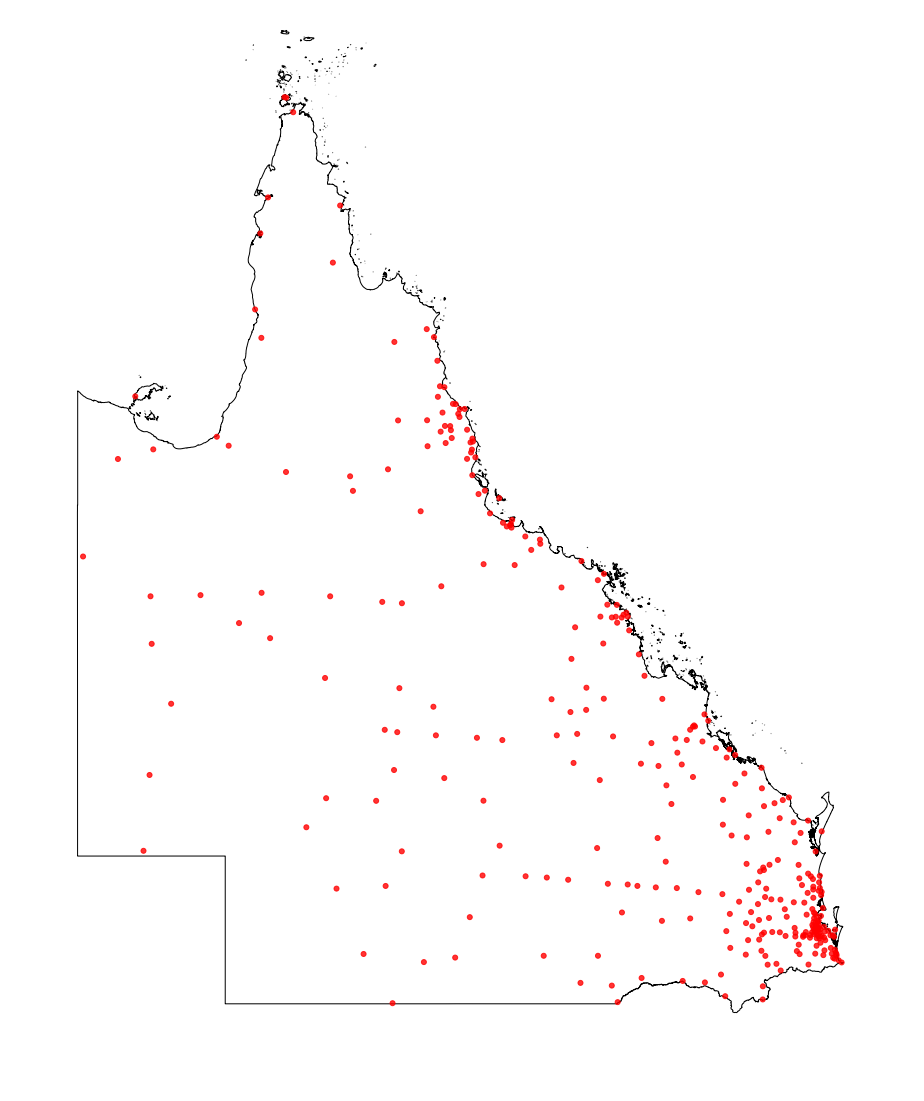

In [57]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=gcrs.PlateCarree())

gplt.polyplot(border, ax=ax, facecolor='white')

gplt.pointplot(stations, ax=ax, color='red', alpha=0.8)

plt.show()

### More Frills

We plot the same map, but more professionally. This time we add title, attributions, a copyright notice, a box around the map, and a latitude / longtitude grid.

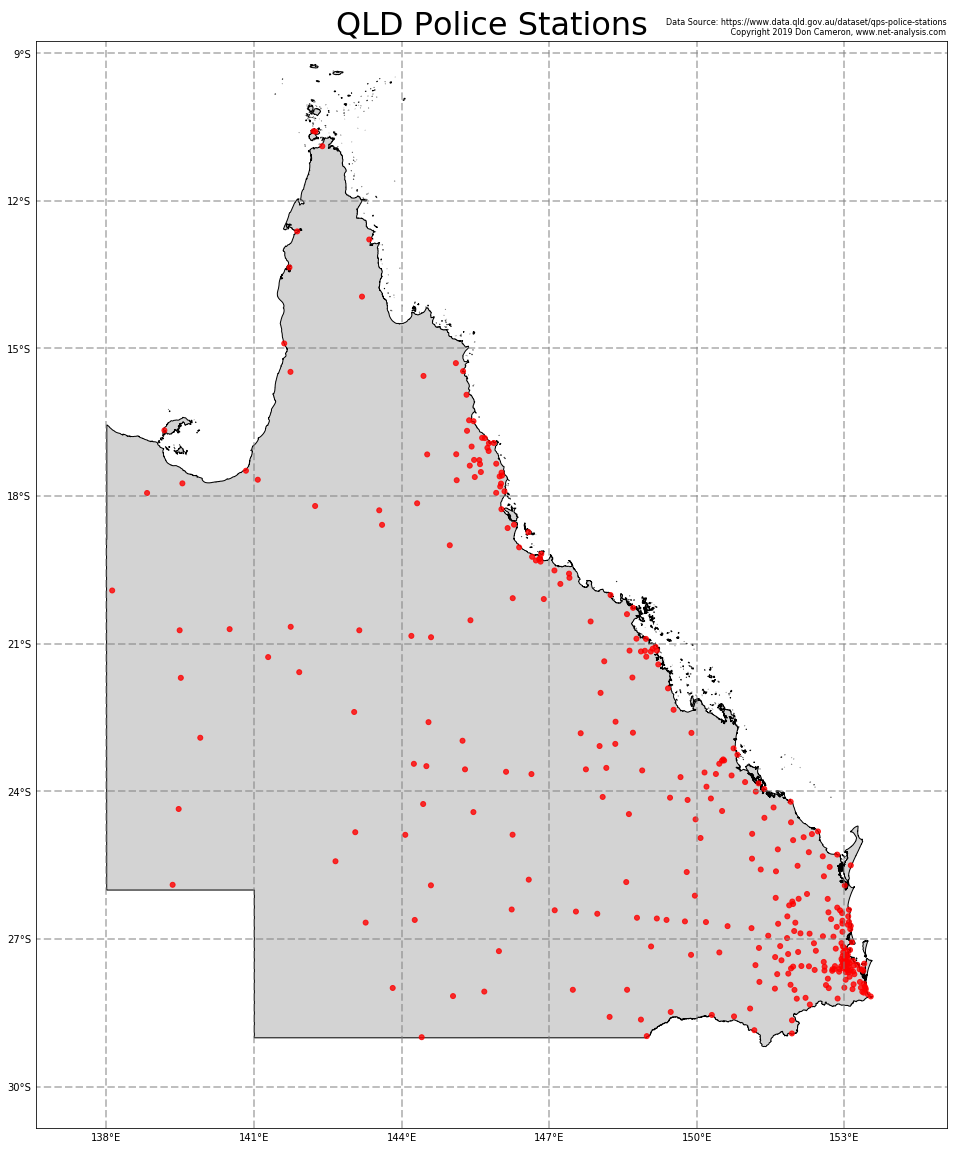

In [58]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=gcrs.PlateCarree())

# draw QLD border
gplt.polyplot(border, ax=ax, facecolor='lightgray')

# draw police stations
gplt.pointplot(stations, ax=ax, color='red', alpha=0.8)

# create titles
ax.set_frame_on(True)
ax.set_title(
    'QLD Police Stations', fontsize=32, loc='center'
)
ax.set_title(
    '\nData Source: '
    + 'https://www.data.qld.gov.au/dataset/qps-police-stations'
    + '\n Copyright 2019 Don Cameron, www.net-analysis.com',
    fontsize=8,
    loc='right',
)

# draw box around map
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)

# add lat/lon gridlines
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color='gray',
    alpha=0.5,
    linestyle='--',
)

# only show labels on left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# show NS EW in labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

### Equal Area Projection

In order to see just how much distortion there was in using the Plate Carree projection, I cranked up an Albers Equal Area projection.  I elected to not center it on the state, but on the left-most state border.

The grid drawing code is commented out, because Cartopy (at least my version) doesn't support lat/lon grids on any projections except Mercator and Plate Carree.

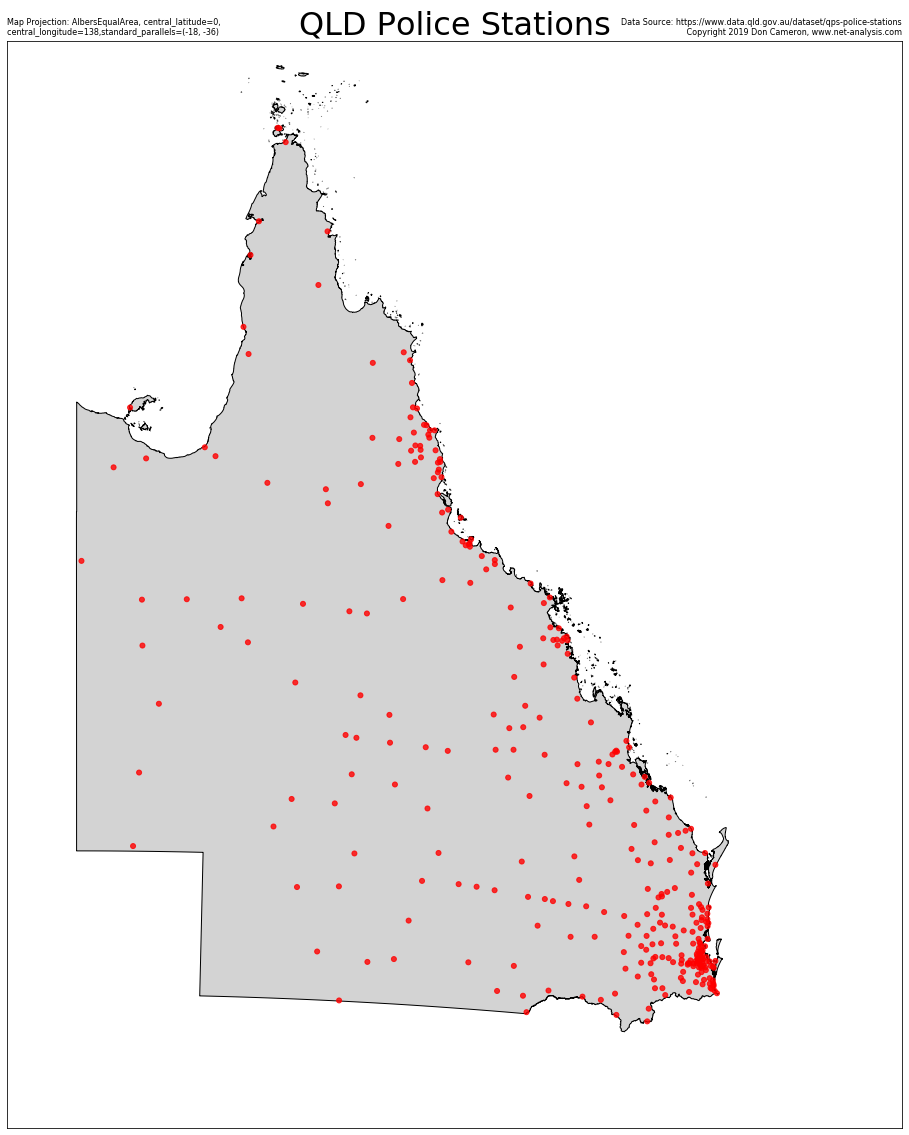

In [59]:
fig = plt.figure(figsize=(20, 20))

albo = gcrs.AlbersEqualArea(
    central_latitude=0,
    false_easting=0,
    false_northing=0,
    central_longitude=138,
    standard_parallels=(-18, -36),
)

ax = fig.add_subplot(1, 1, 1, projection=albo)

# draw QLD border
gplt.polyplot(
    border, ax=ax, facecolor='lightgray', projection=albo
)

# draw police stations
gplt.pointplot(
    stations, ax=ax, color='red', alpha=0.8, projection=albo
)

# create titles
ax.set_frame_on(True)
ax.set_title(
    'QLD Police Stations', fontsize=32, loc='center'
)
ax.set_title(
    '\nData Source: '
    + 'https://www.data.qld.gov.au/dataset/qps-police-stations'
    + '\n Copyright 2019 Don Cameron, www.net-analysis.com',
    fontsize=8,
    loc='right',
)
ax.set_title(
    '\nMap Projection: AlbersEqualArea, '
    + 'central_latitude=0,\n'
    + 'central_longitude=138,'
    + 'standard_parallels=(-18, -36) ',
    fontsize=8,
    loc='left',
)

# draw box around map
ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)

'''
# add lat/lon gridlines
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=2,
    color='gray',
    alpha=0.5,
    linestyle='--',
)

# only show labels on left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# show NS EW in labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
'''
plt.show()

It looks a little weird to see line of constant latitude  (e.g. the southern west-most border) not straight.  Just shows how much Mercator has brainwashed us.

The density of stations visually hasn't changed much (at least to my eyes), so I won't bother with equal-area maps any more.

## Voronoi Maps

Two lines of ```geoplot``` code gives us the map below.  The ```border.simplify``` cuts the time to perform the clipping significantly.

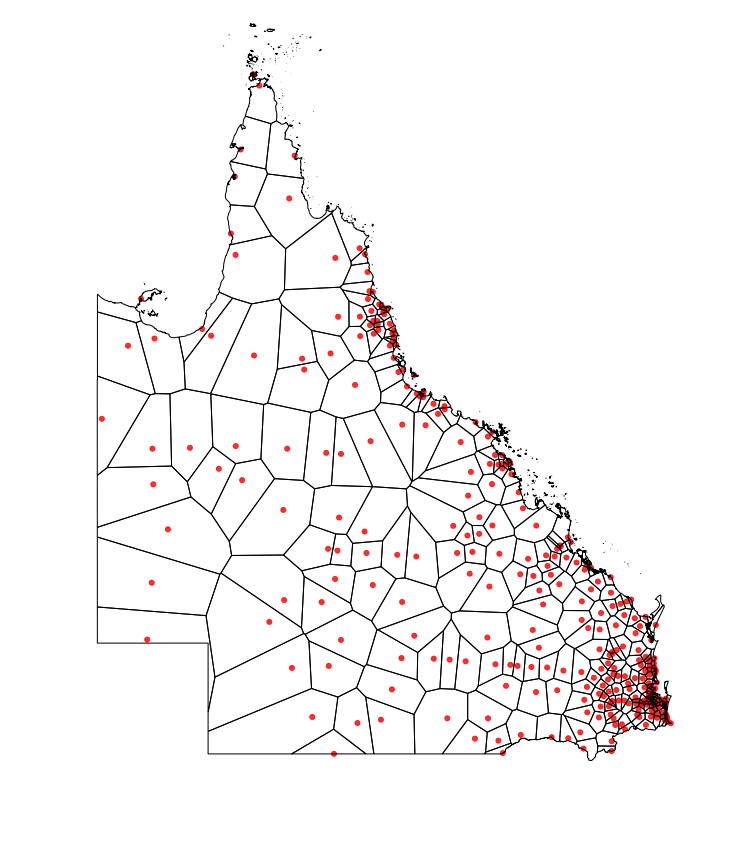

In [60]:
ax = gplt.voronoi(
    stations, clip=border.simplify(0.001), figsize=(15, 15)
)
gplt.pointplot(stations, ax=ax, color='red', alpha=0.8)

This gives you a sense of how big an area each of the western police stations has to service.  It also highlights to me those stations are are *not* near the center of their areas, but are paired with a nearby station (a bit like twin primes?)

In order to get a better sense of scale, I decided to add a scalebar.

### Adding a scale bar

First, we define a function that moves (displaces) a lat / lon point a given distance away.

In [61]:
def displace(
    lat: float = 0,
    lon: float = 0,
    delta_n: float = 0,
    delta_e: float = 1000,
) -> (float, float):
    '''
    displace: given a lat lon pair, return the lat lon pair after displacement
    
    Parameters:
    lat: int or float - origin latitude in signed degrees default 0
    lon: int or float - origin longitude in signed degrees default 0
    delta_n: int or float - displacement in y direction metres default 0
    delta_e: inr or float - displacement in x direction metres default 1000
    
    returns
    (float, float) - lat, lon of displaced point signed degrees
    
    Side effects:
    None
    
    Limitations:
    This is for creating scale bars (and the like), and is NOT for navigation usage
    It assumes the earth is a perfect sphere.
    '''

    # Earth’s radius, sphere
    R = 6378137.0

    # offsets in meters
    dn = delta_n
    de = delta_e

    Pi = math.pi

    # Coordinate offsets in radians
    dLat = dn / R
    dLon = de / (R * math.cos(Pi * lat / 180))

    # OffsetPosition, decimal degrees
    lat2 = lat + dLat * 180 / Pi
    lon2 = lon + dLon * 180 / Pi

    return (lat2, lon2)


# end displace

Now we define a function to actually draw a scale bar at a given lat / lon point, with a given length.

In [131]:
def show_scale_bar(
    ax,
    lat: float = 0,
    lng: float = 0,
    scale_bar_length_km: int = 100,
    fontsize: int = 10,
) -> None:
    '''
    show_scale_bar: draw a scale bar on a map
    
    Parameters:
    ax: matplotlib Axes object
    lat: float - latitude of left end of scale bar (degrees) default 0
    lng: float - longitude of left end of scale bar (degrees) default 0
    scale_bar_length_km: int - length of scale bar in kilometers default 100
    fontsize: int - size of text in scale bar default 10
    
    Returns:
    None
    
    Side Effects:
    scale bar added to ax object
    '''

    # find other end of scale bar - assume all scale bars horizontal
    # displace function needs offset in metres
    lat2, lng2 = displace(
        lat=lat,
        lon=lng,
        delta_n=0,
        delta_e=scale_bar_length_km * 1000,
    )

    # create a geopandas data frame for the scale bar
    l1 = shapely.geometry.LineString(
        [(lng, lat), (lng2, lat2)]
    )
    scale_bar_gs = gpd.GeoSeries([l1])
    scale_bar_df = gpd.GeoDataFrame(
        {'geometry': scale_bar_gs}
    )

    # tell cartopy / geoplot coordinates are in lat / lon
    scale_bar_df.crs = {'init': 'epsg:4326'}

    # plot the scale bar
    scale_bar_df.plot(
        ax=ax, linewidth=20, color='lightgray', alpha=0.8
    )

    # draw text in center of  bar, showing how long it is
    ax.text(
        (lng + lng2) / 2.0,
        lat,
        f'{scale_bar_length_km} km',
        ha='center',
        va='center',
        fontsize=fontsize,
    )


# end show_scale_bar

Finally, we draw our map again, this time with a scale bar.

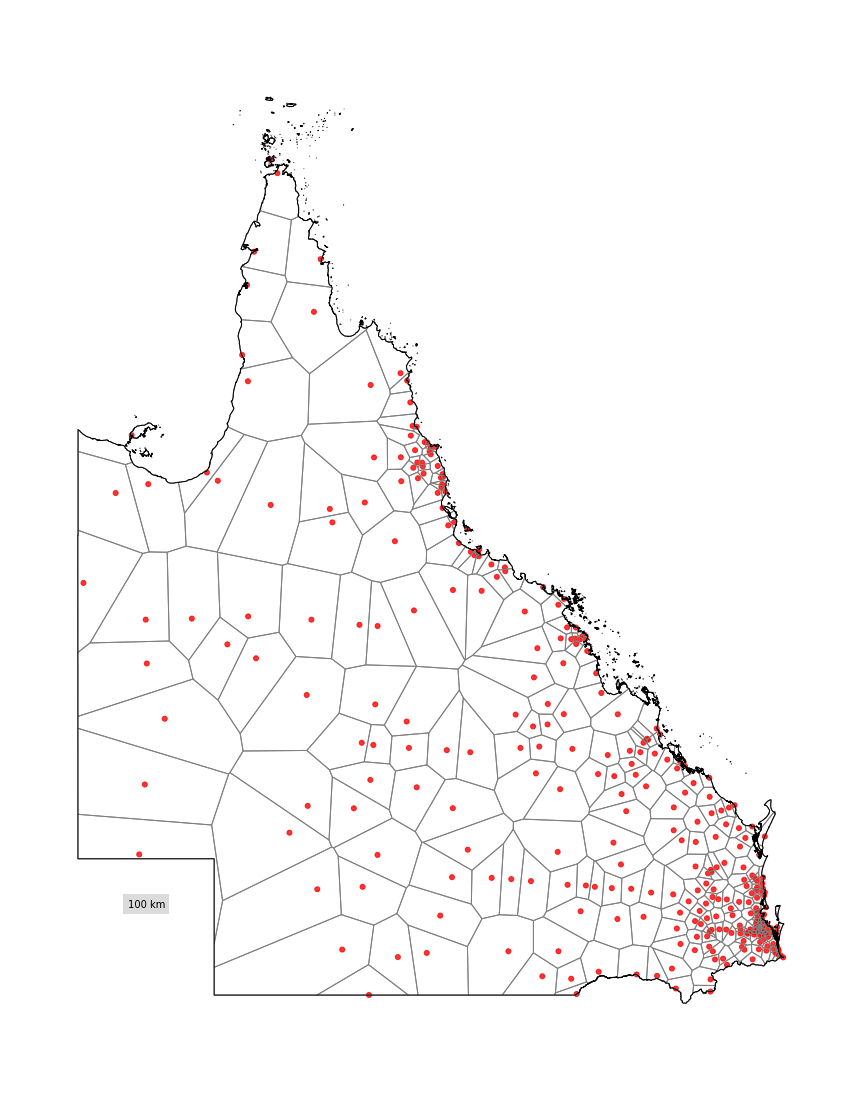

In [132]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=gcrs.PlateCarree())

simplify_tolerance = 0.001  # filter out small islands

# draw station voronoi tiles 
gplt.voronoi(
    stations,
    ax=ax,
    clip=border.simplify(simplify_tolerance),
    edgecolor='gray',
)

# draw station  locations
gplt.pointplot(stations, ax=ax, color='red', alpha=0.8)


# put scale bar south of QLD border, 100 km long
lat1 = -27
lng1 = 139
scale_bar_length_km = 100
show_scale_bar(
    ax,
    lat=lat1,
    lng=lng1,
    scale_bar_length_km=scale_bar_length_km,
)

# draw state border in black
gplt.polyplot(
    border.simplify(simplify_tolerance),
    ax=ax,
    facecolor='none',
    edgecolor='black',
    zorder=10,
)

plt.show()

All that effort for a squinty little scale bar, but I was able to learn about adding test suites in Notebooks (see below).

## Reproducability Information

In [42]:
%watermark -h -iv

shapely     1.6.4.post1
cartopy     0.17.0
pandas      0.23.4
geopandas   0.5.1
geoplot     0.4.0
numpy       1.15.4
mapclassify 2.0.1
matplotlib  3.0.2
host name: DESKTOP-SODFUN6


In [43]:
%watermark

2019-11-20T14:10:10+10:00

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [191]:
theNotebook = 'GeoplotVoronoi.ipynb'

In [194]:
# show info to support reproducibility


def python_env_name():
    envs = subprocess.check_output(
        'conda env list'
    ).splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(
        filter(lambda s: '*' in str(s), envu)
    )[0]
    env_name = str(active_env).split()[0]
    return env_name


# end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print(
    'Notebook run at: '
    + str(datetime.datetime.now())
    + ' local time'
)
print(
    'Notebook run at: '
    + str(datetime.datetime.utcnow())
    + ' UTC'
)
print('Notebook run on: ' + platform.platform())

python version : 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
python environment : ac5-py37
pandas version : 0.23.4
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\QLDCrashLocationsNotebookProject\develop
Notebook name: GeoplotVoronoi.ipynb
Notebook run at: 2019-11-24 23:01:07.359925 local time
Notebook run at: 2019-11-24 13:01:07.359925 UTC
Notebook run on: Windows-10-10.0.18362-SP0


----
## Test Suites

So I have a function ```displace```.  This function could be tested by assert statements, or by ```doctest```.  I have  chosen to do both, as well as other forms of testing.

In [88]:
earth_circum = math.pi * 2 * 6378137

In [89]:
# halfway round the equator

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_n=0,
            delta_e=(earth_circum / 2.0),
        )[0]
    )
    == 0
), 'displace lat fail on halfway round the equator'

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_n=0,
            delta_e=(earth_circum / 2.0),
        )[1]
    )
    == 180
), 'displace lon fail on halfway round the equator'

In [90]:
assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_n=0,
            delta_e=-(earth_circum / 2.0),
        )[0]
    )
    == 0
), 'displace lat fail on halfway round the equator -ve'

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_n=0,
            delta_e=-(earth_circum / 2.0),
        )[1]
    )
    == -180
), 'displace lon fail on halfway round the equator -ve'

In [91]:
# quarter way round the equator

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_n=0,
            delta_e=(earth_circum / 4.0),
        )[0]
    )
    == 0
), 'displace lat fail on quarter way round the equator'

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_n=0,
            delta_e=(earth_circum / 4.0),
        )[1]
    )
    == 90
), 'displace lon fail on quarter way round the equator'

In [92]:
# quarter way to north pole

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_e=0,
            delta_n=(earth_circum / 8.0),
        )[0]
    )
    == 45
), 'displace lat fail on quarter way to north pole'

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_e=0,
            delta_n=(earth_circum / 8.0),
        )[1]
    )
    == 0
), 'displace lon fail on quarter way to north pole'

In [93]:
# quarter way to south pole

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_e=0,
            delta_n=-(earth_circum / 8.0),
        )[0]
    )
    == -45
), 'displace lat fail on quarter way to south pole'

assert (
    int(
        displace(
            lat=0,
            lon=0,
            delta_e=0,
            delta_n=-(earth_circum / 8.0),
        )[1]
    )
    == 0
), 'displace lon fail on quarter way to south pole'

In [94]:
# quarter way to south pole at random longitude (67)

assert (
    int(
        displace(
            lat=0,
            lon=67,
            delta_e=0,
            delta_n=-(earth_circum / 8.0),
        )[0]
    )
    == -45
), 'displace lat fail on quarter way to south pole at random longitude (67)'

assert (
    int(
        displace(
            lat=0,
            lon=67,
            delta_e=0,
            delta_n=-(earth_circum / 8.0),
        )[1]
    )
    == 67
), 'displace lon fail on quarter way to south pole at random longitude (67)'

#### Doctest suites

It appears that ```doctest``` only handles one doctest string in a Notebook, so a number of tests are contained below.

In [128]:
''' 
 >>> earth_circum = math.pi * 2 * 6378137
 >>> int(
 ...       displace(
 ...           lat=0,
 ...           lon=67,
 ...           delta_e=0,
 ...           delta_n=-(earth_circum / 8.0),
 ...       )[1]
 ...   )
 67
 >>> int(
 ...       displace(
 ...           lat=0,
 ...           lon=0,
 ...           delta_e=0,
 ...           delta_n=-(earth_circum / 8.0),
 ...       )[1]
 ...   )
 0
 >>> int(
 ...       displace(
 ...           lat=0,
 ...           lon=0,
 ...           delta_e=0,
 ...           delta_n=-(earth_circum / 8.0),
 ...       )[0]
 ...   )
 -45
 >>> int(
 ...       displace(
 ...           lat=0,
 ...           lon=0,
 ...           delta_e=0,
 ...           delta_n=(earth_circum / 8.0),
 ...       )[0]
 ...   )
 45
 >>> int(
 ...       displace(
 ...           lat=0,
 ...           lon=0,
 ...           delta_n=0,
 ...           delta_e=(earth_circum / 4.0),
 ...       )[1]
 ...   )
 90
 >>> int(
 ...       displace(
 ...           lat=0,
 ...           lon=0,
 ...           delta_n=0,
 ...           delta_e=(earth_circum / 4.0),
 ...       )[0]
 ...   )
 0
 
'''
pass

In [129]:
doctest.testmod(verbose=False)

TestResults(failed=0, attempted=7)

### Random Test Cases

Perform random test cases.

In [136]:
#  the displacement in the x (lon) direction can range from -(circum)/2 to +(circum)/2
#  the displacement in the y (lat) direction can range from -(circum)/4 to +(circum)/4

lat = 0
lon = 0

# test 1000 steps and back in X direction from 0,0
for n in range(1000):
    delta_e = random.uniform(
        -earth_circum / 2.0, earth_circum / 2.0
    )

    lat2, lon2 = displace(
        lat=lat, lon=lon, delta_n=0, delta_e=delta_e
    )
    lat3, lon3 = displace(
        lat=lat2, lon=lon2, delta_n=0, delta_e=-delta_e
    )

    # require 6 decimal places of accuracy
    assert (
        int(1_000_000 * (lat3 - lat)) == 0
    ), f'X displace {delta_e} and back, but latitude changed {lat} -> {lat3}'

    assert (
        int(1_000_000 * (lon3 - lon)) == 0
    ), f'X displace {delta_e} and back, but latitude changed {lon} -> {lon3}'
# end for

In [137]:
# test 1000 steps and back in Y direction from 0,0
for n in range(1000):
    delta_n = random.uniform(
        -earth_circum / 4.0, earth_circum / 4.0
    )

    lat2, lon2 = displace(
        lat=lat, lon=lon, delta_e=0, delta_n=delta_n
    )
    lat3, lon3 = displace(
        lat=lat2, lon=lon2, delta_e=0, delta_n=-delta_n
    )

    # require 6 decimal places of accuracy
    assert (
        int(1_000_000 * (lat3 - lat)) == 0
    ), f'Y displace {delta_n} and back, but latitude changed {lat} -> {lat3}'

    assert (
        int(1_000_000 * (lon3 - lon)) == 0
    ), f'Y displace {delta_n} and back, but latitude changed {lon} -> {lon3}'
# end for

In [138]:
# step away from random spot and back, check back at original spot

for n in range(1000):
    lat = random.uniform(-80, 80)
    lon = random.uniform(-170, 170)

    delta_e = random.uniform(-100, 100)
    delta_n = random.uniform(-100, 100)

    lat2, lon2 = displace(
        lat=lat, lon=lon, delta_e=delta_e, delta_n=delta_n
    )
    lat3, lon3 = displace(
        lat=lat2,
        lon=lon2,
        delta_e=-delta_e,
        delta_n=-delta_n,
    )

    # require 6 decimal places of accuracy
    assert (
        int(1_000_000 * (lat3 - lat)) == 0
    ), f'Y displace {delta_e}, {delta_n} and back, but latitude changed {lat} -> {lat3}'

    assert (
        int(1_000_000 * (lon3 - lon)) == 0
    ), f'Y displace {delta_e}, {delta_n} and back, but latitude changed {lon} -> {lon3}'
# end for

In this test suite, we compute distance between lat / lon pairs by independent code (shares Earth radius value).  Computed step value should match requested step.

In [149]:
def toRadians(angle: float) -> float:
    '''
    toRadians: convert degrees to radians
    
    Parameters:
    angle :float - angle to be converted degrees
    
    Returns:
    value of angle in radians
    
    Side Effects: 
    None
    '''
    return (angle / 180.0) * math.pi


# end toRadians


def distance(
    lat1: float = 0,
    lon1: float = 0,
    lat2: float = 0,
    lon2: float = 0,
) -> float:
    '''
    distance: returns distance in metres between two lat/lon pairs
    
    Parameters:
    lat1: float latitude of first point degrees
    lon1: float longitude of first point degrees
    lat2: float latitude on second point degrees
    lon2: float longitude of second point degrees
    
    Returns:
    distance in metres
    '''
    R = earth_circum / (2 * math.pi)
    phi1 = toRadians(lat1)
    phi2 = toRadians(lat2)
    delta_phi = toRadians(lat2 - lat1)
    delta_lambda = toRadians(lon2 - lon1)

    a = math.sin(delta_phi / 2) * math.sin(
        delta_phi / 2
    ) + math.cos(phi1) * math.cos(phi2) * math.sin(
        delta_lambda / 2
    ) * math.sin(
        delta_lambda / 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d


# end distance

# test random displacements in X  from 0,0
lat = 0
lon = 0
for n in range(1000):
    delta_e = random.uniform(-10_000, 10_000)
    delta_n = 0

    lat2, lon2 = displace(
        lat=lat, lon=lon, delta_e=delta_e, delta_n=delta_n
    )

    # compute step size by other means
    step = distance(
        lat1=lat, lon1=lon, lat2=lat2, lon2=lon2
    )

    # require 6 decimal places of accuracy
    assert (
        int((step - abs(delta_e)) * 1_000_000) == 0
    ), f'X step {delta_e}, computed step {step}'
# end for

# test random displacements in Y  from 0,0
lat = 0
lon = 0
for n in range(1000):
    delta_n = random.uniform(-10_000, 10_000)
    delta_e = 0

    lat2, lon2 = displace(
        lat=lat, lon=lon, delta_e=delta_e, delta_n=delta_n
    )

    # compute step size by other means (always positive)
    step = distance(
        lat1=lat, lon1=lon, lat2=lat2, lon2=lon2
    )

    # require 6 decimal places of accuracy
    assert (
        int((step - abs(delta_n)) * 1_000_000) == 0
    ), f'Y step {delta_n}, computed step {step}'
# end for